In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

from sklearn.metrics import root_mean_squared_error

from matplotlib import pyplot as plt

In [2]:
# !wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

# Preparing the dataset

In [3]:
df = pd.read_csv('jamb_exam_results.csv')
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jamb_score                    5000 non-null   int64  
 1   study_hours_per_week          5000 non-null   int64  
 2   attendance_rate               5000 non-null   int64  
 3   teacher_quality               5000 non-null   int64  
 4   distance_to_school            5000 non-null   float64
 5   school_type                   5000 non-null   object 
 6   school_location               5000 non-null   object 
 7   extra_tutorials               5000 non-null   object 
 8   access_to_learning_materials  5000 non-null   object 
 9   parent_involvement            5000 non-null   object 
 10  it_knowledge                  5000 non-null   object 
 11  student_id                    5000 non-null   int64  
 12  age                           5000 non-null   int64  
 13  gen

In [6]:
del df['student_id']

In [7]:
df.fillna(0, inplace=True)

In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_full_train.reset_index(drop=True, inplace=True)
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [9]:
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

In [10]:
len(y_train), len(y_val), len(y_test)

(3000, 1000, 1000)

In [11]:
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [12]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train

array([[ 0.,  1., 21., ...,  0., 20.,  3.],
       [ 0.,  1., 22., ...,  1., 11.,  2.],
       [ 0.,  1., 19., ...,  0., 31.,  1.],
       ...,
       [ 0.,  1., 16., ...,  1., 17.,  4.],
       [ 1.,  0., 21., ...,  0., 25.,  2.],
       [ 0.,  1., 17., ...,  0., 18.,  2.]])

In [13]:
val_dicts = df_val.fillna(0).to_dict('records')
X_val = dv.transform(val_dicts)
X_val

array([[ 0.,  1., 16., ...,  0., 20.,  2.],
       [ 0.,  1., 17., ...,  1., 15.,  2.],
       [ 0.,  1., 16., ...,  0., 20.,  3.],
       ...,
       [ 0.,  1., 17., ...,  0., 38.,  2.],
       [ 1.,  0., 15., ...,  1., 11.,  2.],
       [ 0.,  1., 22., ...,  0., 40.,  2.]])

In [14]:
dv.get_feature_names_out()

array(['access_to_learning_materials=No',
       'access_to_learning_materials=Yes', 'age', 'assignments_completed',
       'attendance_rate', 'distance_to_school', 'extra_tutorials=No',
       'extra_tutorials=Yes', 'gender=Female', 'gender=Male',
       'it_knowledge=High', 'it_knowledge=Low', 'it_knowledge=Medium',
       'parent_education_level', 'parent_education_level=Primary',
       'parent_education_level=Secondary',
       'parent_education_level=Tertiary', 'parent_involvement=High',
       'parent_involvement=Low', 'parent_involvement=Medium',
       'school_location=Rural', 'school_location=Urban',
       'school_type=Private', 'school_type=Public',
       'socioeconomic_status=High', 'socioeconomic_status=Low',
       'socioeconomic_status=Medium', 'study_hours_per_week',
       'teacher_quality'], dtype=object)

# Question 1

Let's train a decision tree regressor to predict the `jamb_score` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `study_hours_per_week`
* `attendance_rate`
* `teacher_quality`
* `distance_to_school`

In [15]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [16]:
from sklearn.tree import export_text

print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



# Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 22.13
* 42.13
* 62.13
* 82.12

In [17]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [18]:
y_pred = rf.predict(X_val)
root_mean_squared_error(y_val, y_pred).round(3)

np.float64(42.137)

# Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

In [19]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred).round(3)
    scores.append((n, rmse))

In [20]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,42.137
1,20,41.461
2,30,41.106
3,40,40.917
4,50,40.852
5,60,40.784
6,70,40.677
7,80,40.539
8,90,40.504
9,100,40.517


Text(0, 0.5, 'RMSE')

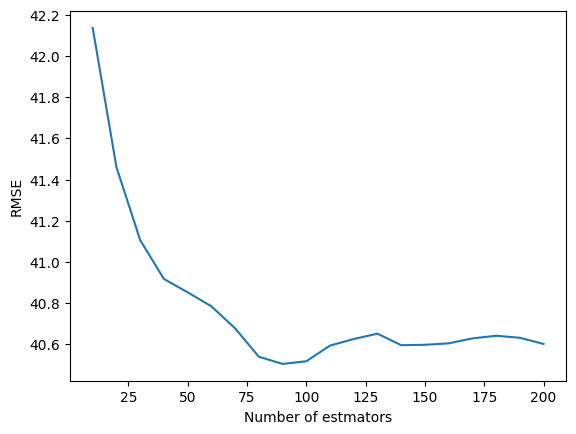

In [21]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.xlabel('Number of estmators')
plt.ylabel('RMSE')

# Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

In [22]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, n_jobs=-1) 
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred) 
        scores.append((n, d, rmse))

In [23]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'max_depth', 'rmse'])
df_scores.head()

,n_estimators,max_depth,rmse
0,10,10,41.258349
1,20,10,40.880528
2,30,10,40.624956
3,40,10,40.270069
4,50,10,40.317006


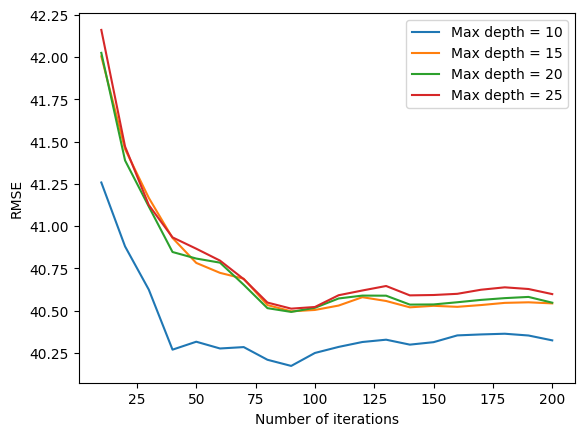

In [24]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=f'Max depth = {d}')
    plt.xlabel('Number of iterations')
    plt.ylabel('RMSE')

plt.legend()

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `study_hours_per_week`
* `attendance_rate`
* `distance_to_school`
* `teacher_quality`

In [25]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1) 
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [26]:
pd.DataFrame(list(zip(dv.get_feature_names_out(), rf.feature_importances_)), columns=['Feature', 'Importance'])\
    .sort_values('Importance', ascending=False).reset_index(drop=True)

,Feature,Importance
0,study_hours_per_week,0.248354
1,attendance_rate,0.149729
2,distance_to_school,0.136486
3,teacher_quality,0.082682
4,age,0.069311
5,assignments_completed,0.031517
6,socioeconomic_status=High,0.025714
7,parent_involvement=High,0.022919
8,it_knowledge=High,0.017719
9,parent_education_level=Secondary,0.016957


# Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [27]:
features = list(dv.get_feature_names_out())

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [28]:
scores = {}

eta_keys = [0.3, 0.1]

In [34]:
evals_result = {}
watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, evals_result=evals_result, verbose_eval=5, num_boost_round=100)

[0]	train-rmse:45.50072	val-rmse:46.99373
[5]	train-rmse:40.15460	val-rmse:43.05644
[10]	train-rmse:37.11353	val-rmse:41.55631
[15]	train-rmse:35.07766	val-rmse:40.70892
[20]	train-rmse:33.57997	val-rmse:40.37859
[25]	train-rmse:32.50134	val-rmse:40.21661
[30]	train-rmse:31.47315	val-rmse:40.20963
[35]	train-rmse:30.68870	val-rmse:40.19360
[40]	train-rmse:29.89807	val-rmse:40.15747
[45]	train-rmse:29.33094	val-rmse:40.21096
[50]	train-rmse:28.58793	val-rmse:40.28533
[55]	train-rmse:27.95277	val-rmse:40.44296
[60]	train-rmse:27.26360	val-rmse:40.55054
[65]	train-rmse:26.56706	val-rmse:40.66625
[70]	train-rmse:26.05959	val-rmse:40.73555
[75]	train-rmse:25.55747	val-rmse:40.76267
[80]	train-rmse:25.13835	val-rmse:40.82813
[85]	train-rmse:24.64140	val-rmse:40.87915
[90]	train-rmse:23.93958	val-rmse:40.89645
[95]	train-rmse:23.39469	val-rmse:40.95651
[99]	train-rmse:23.14487	val-rmse:41.04335


In [ ]:
def parse_xgb_output(output):
    columns = ['iteration', 'train_rmse', 'val_rmse']
    train_rmse = list(output['train'].values())[0]
    val_rmse = list(output['val'].values())[0]

    results = list(zip(range(1, len(train_rmse) + 1), train_rmse, val_rmse))
    df = pd.DataFrame(results, columns=columns)
    return df

In [36]:
df_score = parse_xgb_output(evals_result)
df_score.head()

,iteration,train_rmse,val_rmse
0,1,45.500720,46.993728
1,2,44.125826,45.897712
2,3,42.928153,45.017463
3,4,41.904445,44.275685
4,5,40.942375,43.624111


In [37]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_xgb_output(evals_result)

scores.keys()

dict_keys(['eta=0.3', 'eta=0.1'])

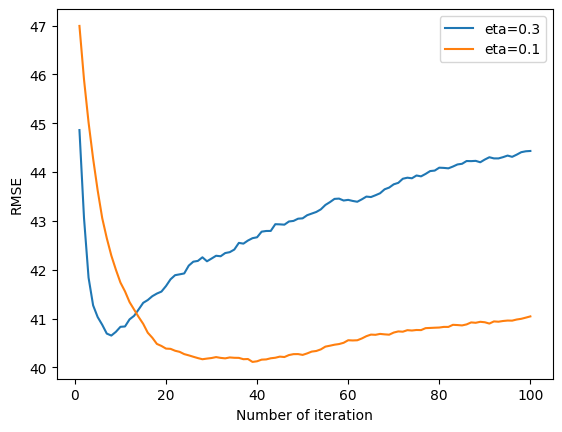

In [38]:
for key, df_score in scores.items():
    plt.plot(df_score.iteration, df_score.val_rmse, label=key)

plt.xlabel('Number of iteration')
plt.ylabel('RMSE')

plt.legend()

In [39]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)
y_pred = model.predict(dval)
root_mean_squared_error(y_val, y_pred) 

np.float64(44.432098039002526)

In [40]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)
y_pred = model.predict(dval)
root_mean_squared_error(y_val, y_pred) 

np.float64(41.043354592351655)